<a href="https://colab.research.google.com/github/rohitnikam1/Statistical_Financial_Analysis/blob/master/11_Model_Misspecification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Misspecification**
Model specification refers to the selection of the general function that we are fitting to the data. We need to select:
 - the dependent variable(s)
 - the independent variable(s)
 - the functional form

For instance, we may assume that the dependent variable is a linear function of two independent variables. If the model is not correctly specified, regression assumptions will be violated and the model will not be accurate. Below we define and explain many of the common model specification errors.
## **Exclusion of important variables**
If we omit a variable which is uncorrelated with the variables that we do include, we will simply not explain the dependent variable as well as we could. However, if the omitted variable (say, $X_2$) is correlated with the included variable ($X_1$), then the omission additionally affects the model. The coefficient of $X_1$ and the constant term in the regression will be biased by trying to compensate for the omission of $X_2$. This can lead us to overestimate the effect of $X_1$ on the dependent variable. Also, estimated values of the coefficients and the estimated standard errors will be inconsistent.

In particular, we may be led to believe that two variables have a causal relationship because of their high correlation, when in fact they are both caused by a third. For instance, if two stocks both follow the market, or two quantities both tend to increase with time, they will be highly correlated.


In [94]:
# Import the libraries we'll be using
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=03ce17dd6da8bff11204461903fcc99cdec864ddcf264c9ca0c3e32e218fef03
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [60]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [4]:
def get_data(tickers, start, end):
  '''Get stock data for tickers'''
  stockData = pdr.get_data_yahoo(tickers, start=start, end=end)
  stockData = stockData['Close']
  return stockData

In [5]:
# Pull the pricing data for our two stocks and S&P 500
start = '2013-01-01'
end = '2015-01-01'
bench = get_data(['SPY'], start=start, end=end) 
a1 = get_data(['LRCX'], start=start, end=end)
a2 = get_data(['AAPL'], start=start, end=end) 

# Perform linear regression and print R-squared values
slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()
print("R-squared values of linear regression")
print(f"LRCX and AAPL: {slr12.rsquared}")
print(f"LRCX and SPY: {slrb1.rsquared}")
print(f"AAPL and SPY: {slrb2.rsquared}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
R-squared values of linear regression
LRCX and AAPL: 0.9114588344215999
LRCX and SPY: 0.8746056102007451
AAPL and SPY: 0.7959755586204602


It's hard to see consistency, or lack of it, since it is asymptotic and probabilistic. However, we can extend our sample period to see how the R-squared value changes. The correlation between the stocks and the market seems to persist, while the correlation between the two stocks drops. So we would be better off predicting the stock prices from the market price than from each other.

In [6]:
# Pull pricing data from further back
start = '2009-01-01'
end = '2015-01-01'

bench = get_data(['SPY'], start=start, end=end) 
a1 = get_data(['LRCX'], start=start, end=end)
a2 = get_data(['AAPL'], start=start, end=end) 

# Perform linear regression and print R-squared values
slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()

print("R-squared values of linear regression")
print(f"LRCX and AAPL: {slr12.rsquared}")
print(f"LRCX and SPY: {slrb1.rsquared}")
print(f"AAPL and SPY: {slrb2.rsquared}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
R-squared values of linear regression
LRCX and AAPL: 0.4998138960650015
LRCX and SPY: 0.7472986038731746
AAPL and SPY: 0.7563500006571211


The best way to avoid this issue is to choose the independent variables which you have reason to believe will be good predictors of the dependent variable before starting the regression analysis. "Before" is key: it's important not to pick variables just based on how good the regression analysis looks because that leads to overfitting.

# **Inclusion of unnecessary variables**
Conversely, we can have a model which includes too many independent variables. If we include a truly unnecessary variable, we will have a lower adjusted R-squared and less precise estimates of the other regression coefficients. That is, our analysis of the model will be weakened, but the model itself will not change.

If we include variables that are only mostly irrelevant, however, we can artificially improve the fit and the R-squared of our model by adding bits of the slightly-correlated variables to conform to the sample data. This runs the risk of overfitting, since the small adjustments we make are sample-specific. 

In [110]:
#For example, below we run a regression with PEP price as the independent variable and PG price as the dependent variable 
#(which makes some sense as they are in the same sector) and then run another regression with three random other stocks added in.


# # Load one year's worth of pricing data for five different assets
# start = '2018-01-01'
# end = '2019-01-01'
# tickers = ['PG', 'PEP', 'MCD', 'NVDA', 'HD']
# data = get_data(tickers, start=start, end=end) 
# y, x1, x2, x3, x4 = (data[tickers[i]] for i in range(len(tickers)))

# # Build a linear model using only x1 to explain y
# slr = regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
# slr_prediction = slr.params[0] + slr.params[1]*x1

# # Run multiple linear regression using x1, x2, x3, x4 to explain y
# mlr = regression.linear_model.OLS(y, sm.add_constant(np.column_stack((x1,x2,x3,x4)))).fit()
# mlr_prediction = mlr.params[0] + mlr.params[1]*x1 + mlr.params[2]*x2 + mlr.params[3]*x3 + mlr.params[4]*x4

# # Compute adjusted R-squared for the two different models
# print(f'SLR R-squared: {slr.rsquared_adj}')
# print(f'MLR R-squared: {mlr.rsquared_adj}')

# # Plot y along with the two different predictions
# _, ax = plt.subplots(figsize=(13,8))
# y.plot()
# slr_prediction.plot()
# mlr_prediction.plot()
# ax.legend(['PG', 'SLR', 'MLR']);

In [111]:
# # Load one year's worth of pricing data for five different assets
# start = '2019-01-01'
# end = '2019-06-01'
# tickers = ['PG', 'PEP', 'MCD', 'NVDA', 'HD']
# data = get_data(tickers, start=start, end=end) 
# y, x1, x2, x3, x4 = (data[tickers[i]] for i in range(len(tickers)))

# # Build a linear model using only x1 to explain y
# slr = regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
# slr_prediction = slr.params[0] + slr.params[1]*x1

# # Run multiple linear regression using x1, x2, x3, x4 to explain y
# mlr = regression.linear_model.OLS(y, sm.add_constant(np.column_stack((x1,x2,x3,x4)))).fit()
# mlr_prediction = mlr.params[0] + mlr.params[1]*x1 + mlr.params[2]*x2 + mlr.params[3]*x3 + mlr.params[4]*x4

# # Compute adjusted R-squared for the two different models
# print(f'SLR R-squared: {slr.rsquared_adj}')
# print(f'MLR R-squared: {mlr.rsquared_adj}')

# # Plot y along with the two different predictions
# _, ax = plt.subplots(figsize=(13,8))
# y.plot()
# slr_prediction.plot()
# mlr_prediction.plot()
# ax.legend(['PG', 'SLR', 'MLR']);

## **Errors in independent variables**
If we use indices or dates as our independent variables, they are error-free. However, when we wish to use the value of a stock $X_t$ as an independent variable, we can only measure the price, which is full of small, random fluctuations. So we actually observe $Z_t = X_t + u_t$ for some error $u_t$. Our model is $$ Y_t = b_0 + b_1 X_t + \epsilon_t $$

that is, that some variable is linearly related to the value of a stock. But since we only know the value of $Z_t$, we use the model $$ Y_t = b_0 + b_1 Z_t + (-b_1u_t + \epsilon_t) $$

If $u_t$ is not correlated with $X_t$, then it will be correlated with $Z_t$, and so the error term $-b_1u_t + \epsilon_t$ will be correlated with our independent variable $Z_t$. Consequently, the coefficients will be biased and inconsistent. In particular, $b_1$ will be biased downward.
## **Incorrect functional form**
After we pick the variables we wish to include, we need to specify a shape for the function. Although a regression requires that the function be linear in the coefficients, we can manipulate the variables to achieve various types of functions. For instance, the model $Y_i = b_0 + b_1 X_i^2 + \epsilon_i$ gives a quadratic relationship between $X$ and $Y$, while the log-linear model $\ln Y_i = b_0 + b_1 X_i + \epsilon_i$ gives an exponential one. Generally we select the form based on our expectation of the relationship: for example, a log-linear model is good when we expect the rate of growth of $Y$ to be related to $X$.

If the wrong form is selected, then we may be unable to get a good fit. In fact, the model may lead to absurd conclusions. For example, if we use a linear model where a logarithmic one would have been more appropriate, we may predict that the number of companies in a certain category becomes negative instead of approaching zero.

We also have to be careful not to pick a functional form that overfits the data. Arbitrarily using high-degree polynomials leads to overfitting since they have more degrees of freedom. Another issue is data-mining: if we try different models until we find the one that looks best, we are overfitting to the sample at the expense of future predictivity.

## **Nonstationary time series**
A stationary process is one whose joint probability distribution does not change with time. In particular, its mean and variance are constant through time. When we apply regression models to time series, we must make the additional assumption that they are stationary. Otherwise, the t-statistics for the parameters will not be valid.

A random walk is a process for which the best estimate for the next value is the previous value; if you were to walk randomly, your location after the each step would be somewhere near your location before the step but in an unpredictable direction. Formally, such a one-dimensional walk is described by the equation $$ x_t = x_{t-1} + \epsilon_t $$

where the error $\epsilon_t$ is homoskedastic, has mean zero, and is not autocorrelated. For example, exchange rates are often assumed to be random walks. Random walks have variance increasing with time, and are therefore not stationary. They are subject to spurious results, and two random walks will appear highly correlated very often. Try running the code below several times:
### **All the walks**

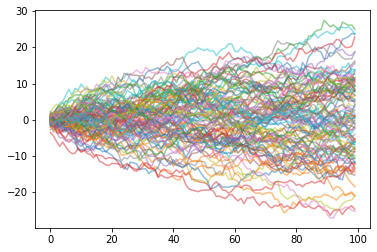

In [108]:
# Generate normally distributed errors
randos = [np.random.randn(100) for i in range(100)]
y = np.random.randn(100)
# Generate random walks
randows = [[sum(rando[:i+1]) for i in range(100)] for rando in randos]
yw = [sum(y[:i+1]) for i in range(100)]

# _, ax = plt.subplots(figsize=(12,8))
for i in range(100):
    plt.plot(randows[i], alpha=0.5)

### **Just those correlated with a randomly chosen one**

Linearly related walks out of 100: 0


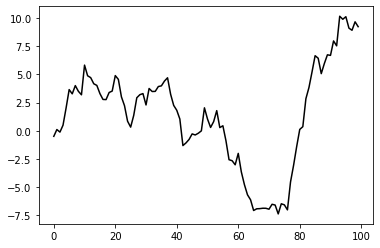

In [107]:
# Compute R-squared of linear regression for each element of randows with yw
rs = [regression.linear_model.OLS(yw, x).fit().rsquared for x in randows]
                    
# Plot and count the random walks that have R-squared with yw > .8
rcount = 0
for i in range(100):
    if rs[i] > .8:
        rcount += 1
        plt.plot(randows[i], alpha=0.5)
print(f'Linearly related walks out of 100: {rcount}')

# Plot yw
# _, ax = plt.subplots(figsize=(12,8))
plt.plot(yw, color='k');

The reason for the two branches above is that a linear fit works well for both positively and negatively correlated variables.

The result is even more extreme if we look at the random walks with significant correlation, according to the p-values of their correlation coefficients:

Significantly correlated walks out of 100: 54


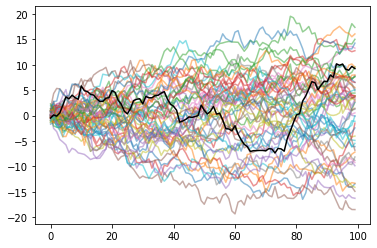

In [106]:
from scipy.stats import pearsonr

# Compute correlation coefficients (Pearson r) and record their p-values
ps = [pearsonr(yw, x)[1] for x in randows]
                    
# Plot and count the random walks that have p-value of correlation with yw < 0.05
pcount = 0
for i in range(100):
    if ps[i] < .05:
        pcount += 1
        plt.plot(randows[i], alpha=0.5)
print(f'Significantly correlated walks out of 100: {pcount}')

# Plot yw
# _, ax = plt.subplots(figsize=(12,8))
plt.plot(yw, color='k');

Because of the high probability of spurious results, the fit statistics that we compute when regressing on random walks are invalid. Furthermore, the parameter estimates are inconsistent.

We can detect random walks and related time series (such as a random walk with drift) by checking for the presence of a unit root in the time series; that is, whether or not it appears to follow the equation $x_t = x_{t-1} + \epsilon_t$. One method is using the Dickey-Fuller test:

In [109]:
from statsmodels.tsa.stattools import adfuller

# Compute the p-value of the Dickey-Fuller statistic to test the null hypothesis that yw has a unit root
print(adfuller(yw)[1])

0.07345465513497632


Therefore we cannot reject the hypothesis that yw has a unit root (as we know it does, by construction). If we know that a time series has a unit root and we would like to analyze it anyway, we can model instead the first differenced series $y_t = x_t - x_{t-1}$ if that is stationary, and use it to predict future values of $x$. We can also use regression if both the dependent and independent variables are time series with unit roots and the two are cointegrated.

# **References**
 - "Quantitative Investment Analysis", by DeFusco, McLeavey, Pinto, and Runkle